___
# Ciência dos Dados - Projeto 1 #
___

### _Gabriela Caruso - 2C_ ###
___

## Índice de Desenvolvimento Humano, consumo de eletricidade e uso de Internet ##

Foram coletados dois dados do site https://www.gapminder.org/:
1. Índice de Desenvolvimento Humano (IDH)
1. Consumo de eletricidade por pessoa
1. Uso de Internet por cem pessoas

Nesses *dataframes*, as linhas representam os países, as colunas representam o ano. O conteúdo de cada célula é a medida do fator em questão de um determinado ano (coluna) para determinado país (linha). 

Vamos nos restringir a analisar o ano de **2011**.

___

## Objetivo ##

Foram criados _dataframes_ para cada um dos fatores acima tentando responder a seguinte pergunta:

***Qual relação pode ser estabelecida entre o Índice de Desenvolvimento Humano (IDH), o consumo de eletricidade por pessoa e o uso de Internt por cem pessoas?***

___

## Introdução ##

Visando entender a relação entre o Índice de Desenvolvimento Humano (IDH), o consumo de eletricidade por pessoa e o uso de Internt por cem pessoas, foi feita uma análise exploratória desses fatores, supondo que haveria uma alta correlação entre eles.

___

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Coleta e seleção de dados ##

Os _dataframes_ criados a seguir já serão restristos ao ano a ser analizado.

___

In [3]:
data = pd.read_excel("IDH.xlsx")
data = data[["HDI",2011]]

data1 = pd.read_excel("ConsumoEletricidade.xlsx")
data1 = data1[["Electricity consumption, per capita (kWh)","2011"]]

data2 = pd.read_excel("UsuariosInternet100.xlsx")
data2 = data2[["Internet users (per 100 people)","2011"]]

In [4]:
dataIDH = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataIDH_idx = dataIDH.set_index('HDI')
dataIDH_idx.head()

,2011
HDI,
Afghanistan,0.398
Albania,0.739
Algeria,0.698
Andorra,0.838
Angola,0.486


In [5]:
dataCE = data1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataCE_idx = dataCE.set_index('Electricity consumption, per capita (kWh)')
dataCE_idx.head()

,2011
"Electricity consumption, per capita (kWh)",
Albania,2021.634918
Algeria,1090.565936
Angola,248.457793
Argentina,2967.388776
Armenia,1754.652308


In [6]:
dataUI = data2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataUI_idx = dataUI.set_index('Internet users (per 100 people)')
dataUI_idx.head()

,2011
Internet users (per 100 people),
Afghanistan,4.58067
Albania,49.00000
Algeria,14.00000
Andorra,81.00000
Angola,14.77600


## Junção dos arquivos ##

Como os arquivos estão separados, será preciso juntá-los em um único _dataframe_.

Para facilitar a visualização e o entendimento dos dados, as colunas foram renomeadas (*"ano"_"fator"*).

___

In [7]:
juncao = dataIDH_idx.join(dataCE_idx, how='inner', lsuffix='_IDH', rsuffix='_Eletricidade')
data_final = juncao.join(dataUI_idx, how="inner", lsuffix='_Eletricidade', rsuffix='_Internet')
data_final.columns = ['2011_IDH', '2011_Eletricidade', '2011_Internet']
data_final

,2011_IDH,2011_Eletricidade,2011_Internet
Albania,0.739,2021.634918,49.000000
Algeria,0.698,1090.565936,14.000000
Angola,0.486,248.457793,14.776000
Argentina,0.797,2967.388776,47.704000
Australia,0.929,10719.901093,78.948075
Austria,0.885,8356.368717,79.747195
Azerbaijan,0.731,1705.424633,50.752743
Bahrain,0.806,10018.069810,77.000000
Bangladesh,0.500,258.618156,5.000000
Belarus,0.756,3627.678666,39.961349


## Criação de um Excel ##

Agora que o _dataframe_ foi feito, será criado um arquivo no Excel para armazená-lo.

___

In [20]:
writer = pd.ExcelWriter('Projeto1_CD.xlsx')
data_final.to_excel(writer,'data')
writer.save()

## Análise do Índice de Desenvolvimento Humano ##

### Descrição e _Boxplot_ ###
___

count    129.000000
mean       0.712760
std        0.151941
min        0.286000
25%        0.625000
50%        0.733000
75%        0.834000
max        0.943000
Name: 2011_IDH, dtype: float64


Text(0.5,1,'Boxplot')

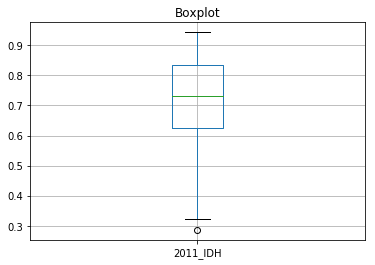

In [36]:
print(data_final["2011_IDH"].describe())
data_final.boxplot("2011_IDH")
plt.title("Boxplot")

### Histograma ###

___

Text(0.5,1,'Histograma')

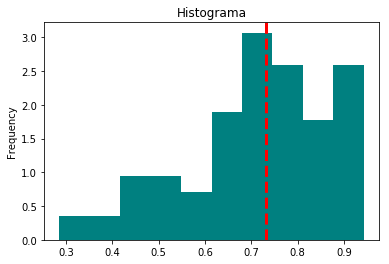

In [9]:
data_final["2011_IDH"].plot(kind="hist", density=True, color=('teal'))
plt.axvline(data_final["2011_IDH"].median(), color="r", linestyle="dashed", linewidth= 3)
plt.title("Histograma")### Histograma ###

Os gráficos acima demonstram a assimetria à esquerda (negativa) do Índice de Desenvolvimento Humano (IDH) no ano de 2011, o que pode ser explicado pelo fato da média estar mais afastada do eixo ordenado do histograma, como pode ser comprovado pelos valores numéricos na descrição acima.

Além disso, o _boxplot_ indica a presença de um _outlier_.

___

## Análise do consumo de eletricidade ##

### Descrição e _Boxplot_ ###
___

count      129.000000
mean      4412.341382
std       5985.895050
min         48.711817
25%        906.505131
50%       2709.262114
75%       5948.865886
max      52373.877009
Name: 2011_Eletricidade, dtype: float64


Text(0.5,1,'Boxplot')

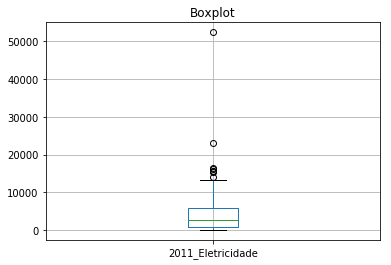

In [35]:
print(data_final["2011_Eletricidade"].describe())
data_final.boxplot("2011_Eletricidade")
plt.title("Boxplot")

### Histograma ###

___

Text(0.5,1,'Histograma')

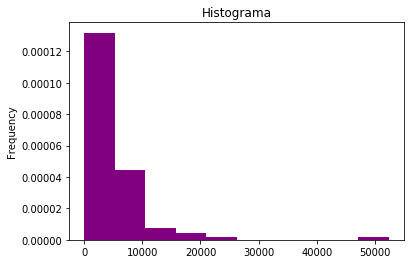

In [11]:
data_final["2011_Eletricidade"].plot(kind="hist", density=True, color=('purple'))
plt### Histograma ###.axvline(data_final["2011_Eletricidade"].median(), color="r", linestyle="dashed", linewidth= 3)
plt.title("Histograma")

Os gráficos acima demonstram a assimetria à direita (positiva) do consumo de eletricidade por pessoa no ano de 2011, o que pode ser explicado pelo fato da média estar mais próxima do eixo ordenado do histograma, como pode ser comprovado pelos valores numéricos na descrição acima.

Além disso, o _boxplot_ indica a presença de alguns _outliers_.

___

## Análise do uso de Internet ##

### Descrição e _Boxplot_ ###
___

count    129.000000
mean      43.744753
std       27.579488
min        0.980000
25%       17.688596
50%       42.100000
75%       69.030843
max       96.618362
Name: 2011_Internet, dtype: float64


Text(0.5,1,'Boxplot')

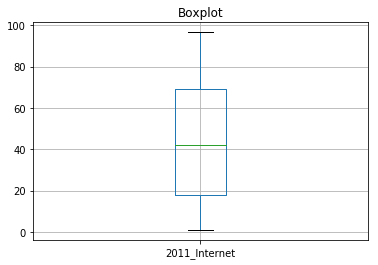

In [34]:
print(data_final["2011_Internet"].describe())
data_final.boxplot("2011_Internet")
plt.title("Boxplot")

### Histograma ###

___

Text(0.5,1,'Histograma')

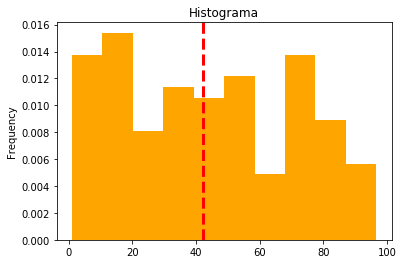

In [13]:
data_final["2011_Internet"].plot(kind="hist", density=True, color=('orange'))
plt.axvline(data_final["2011_Internet"].median(), color="r", linestyle="dashed", linewidth= 3)
plt.title("Histograma")

Os gráficos acima demonstram a leve assimetria à direita (positiva) do uso de Internet por cem pessoas no ano de 2011, o que pode ser explicado pelo fato da média estar levemente mais próxima do eixo ordenado do histograma, como pode ser comprovado pelos valores numéricos na descrição acima.

___

## Descrição do _dataframe_ ##

A tabela a seguir junta as descrições dos três _dataframes_ acima.

___

In [14]:
data_final.describe()

,2011_IDH,2011_Eletricidade,2011_Internet
count,129.000000,129.000000,129.000000
mean,0.712760,4412.341382,43.744753
std,0.151941,5985.895050,27.579488
min,0.286000,48.711817,0.980000
25%,0.625000,906.505131,17.688596
50%,0.733000,2709.262114,42.100000
75%,0.834000,5948.865886,69.030843
max,0.943000,52373.877009,96.618362


## _Outliers - Islândia_ ##

___

In [37]:
outlier = data_final.sort_values(by = "2011_Eletricidade")
outlier.tail(1)

,2011_IDH,2011_Eletricidade,2011_Internet
Iceland,0.898,52373.877009,96.618362


Como pode se perceber pelos gráficos acima, alguns países se destacam como _outliers_, principalmente a Islândia no _boxplot_ do consumo de eletricidade por pessoa.

Esse país apresenta uma alto Índice de Desenvolvimento Humano e um alto índice de consumo de eletricidade e de Internet, o que pode ser justificado pelo seu alto nível de desenvolvimento. 

Pensando na geogafia do país, uma possível razão para seu consumo de eletricidade ser tão destoante dos outros valores é sua localização. Localizando-se bem no Norte do Oceano Atlântico, seus invernos são muito longos e gelados, implicando na alta demanda de energia elétrica.

___

## Correlação ##

Os gráficos criados a seguir demontram a correlação dos fatores em questão e suas linhas de tendêndia (com seus respectivos desvios padrão).

___

In [41]:
data_final.corr()

,2011_IDH,2011_Eletricidade,2011_Internet
2011_IDH,1.000000,0.570662,0.870392
2011_Eletricidade,0.570662,1.000000,0.676030
2011_Internet,0.870392,0.676030,1.000000


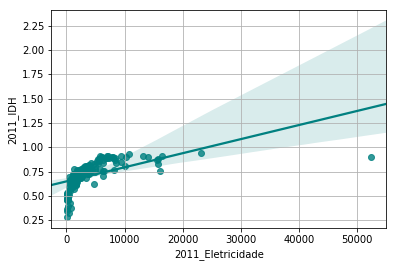

In [40]:
sns.regplot(data_final["2011_Eletricidade"],data_final["2011_IDH"], color=('teal'))
plt.grid()

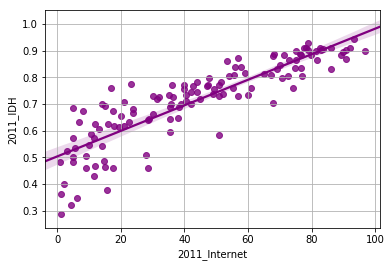

In [17]:
sns.regplot(data_final["2011_Internet"],data_final["2011_IDH"], color=('purple'))
plt.grid()

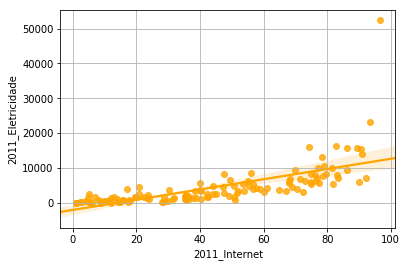

In [18]:
sns.regplot(data_final["2011_Internet"],data_final["2011_Eletricidade"], color=('orange'))

plt.grid()

### Matriz de disperção ###

Os gráficos criados a seguir também demonstram a correlação existente e ainda acrescentam, a partir da variação de cores, outro eixo para a análise: o IDH. Dessa maneira é possível vizualizar os três fatores em um só gráfico.

___

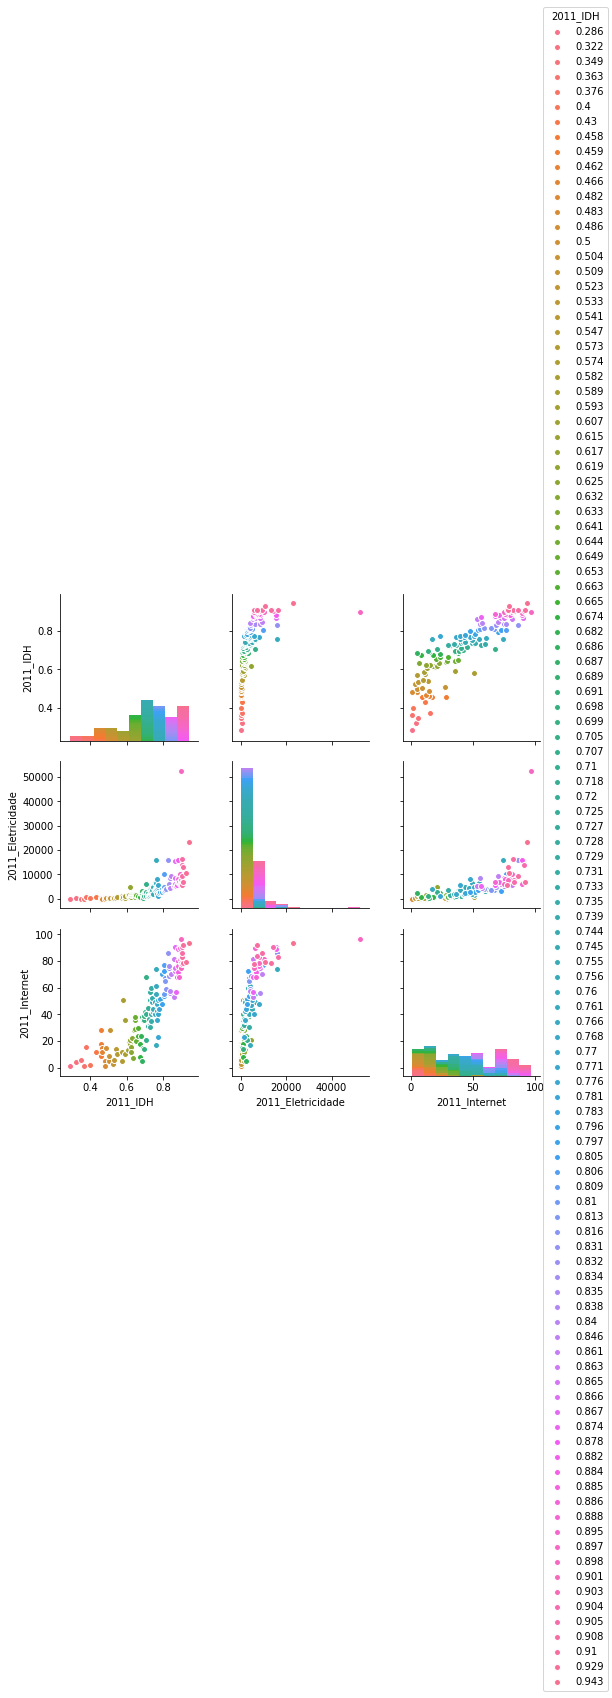

In [19]:
sns.pairplot(data_final, hue = "2011_IDH")

### Observação: ###

Relacionando a variação de cores com os crescimentos dos gráficos de disperção na matriz, pode se perceber certa tendência de correlação entre os fatores. Entretanto, esses dados não necessariamente indicam uma relação.
___

## Conclusão ##

Conforme observado nos gráficos e tabelas acima, pode se perceber uma forte associação entre o Índice de Desenvolvimento Humano e o uso de Internet, entretanto a associação entre o Índice de Desenvolvimento Humano e o consumo de eletricidade e a associação entre o uso de Internet e o consumo de eletricidade, não apresentam um alto índice de correlação.

Com isso é possível concluir que esses fatores não necessariamente estão relacionados, mas há a possibilidade de que algum interfira levemente em outro.

Essas observações nos levam a questionar o embasamento e a quantidade dos dados selecionados para fazer essa análise, o que pode ser investigado em trabalhos futuros.
___